In [514]:
#make sure your drive path is correct! 
# macOS/OS X
# drive_path = '/Volumes/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache/'

# Windows (a good guess)
# drive_path = 'e:/data/dynamic-brain-workshop/brain_observatory_cache'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache'

# AWS
drive_path = '/data/dynamic-brain-workshop/brain_observatory_cache/'

In [515]:
# We need to import these modules to get started
import numpy as np
import pandas as pd
import os
import sys
import h5py
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline

In [516]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = os.path.join(drive_path,'brain_observatory_manifest.json')
print manifest_file

boc = BrainObservatoryCache(manifest_file=manifest_file)

/data/dynamic-brain-workshop/brain_observatory_cache/brain_observatory_manifest.json


In [517]:
def vectorize(mat):
    """Takes a square symmetric matrix mat and returns the vectorized form. Like matlab's squareform.

         Note: could probably also just use scipy's squareform function."""
    assert mat.shape[0] == mat.shape[1]

    vec = mat[:, 0]
    for row in range(1, mat.shape[1]):
        vec = np.concatenate((vec, mat[row:, row]))

    return vec

In [518]:
from scipy.stats import kendalltau as kt
import numpy as np
import scipy.spatial.distance
def get_kt(rsm1,rsm2):
    '''Gets Kendall tau-a measurements between two RDM matrices, first vectorizes matrices
    and then computes kt using scipy kendall-tau function'''
    np.fill_diagonal(rsm1,0)
    np.fill_diagonal(rsm2,0)
    vec_rsm1 = vectorize(rsm1)
    #
    vec_rsm2 = vectorize(rsm2)

    #vec_rsm1 = scipy.spatial.distance.squareform(rsm1)
    #vec_rsm2 = scipy.spatial.distance.squareform(rsm2)
    k = kt(vec_rsm1, vec_rsm2).correlation
    return k

In [519]:
exps=pd.read_hdf(r'/home/arib/SWDB_2017/swdb_2017_tools/projects/mouseRSA/exps_w_RSA.h5',mode='r')

In [520]:
exps.head()

,cre_line,donor_name,failed,id,imaging_depth,reporter_line,specimen_name,tags,targeted_structure,rsa_mean_mean_mahala,rsa_random_mean_mahala,rsa_mean_mean_spectral_embedding,rsa_mean_mean_PCA
0,Cux2-CreERT2,283284,False,566759225,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-283284,[],VISam,"[[0.0, 15.0717277058, 11.2159497239, 12.801501...","[[0.0, 15.0717277058, 11.2159497239, 12.801501...",0,"[[0.0, 23.0786825252, 21.2174191481, 22.739709..."
1,Nr5a1-Cre,261969,False,546328009,350,Ai93(TITL-GCaMP6f),Nr5a1-Cre;Camk2a-tTA;Ai93-261969,[],VISal,"[[0.0, 0.741935932081, 0.599953696213, 0.80095...","[[0.0, 0.741935932081, 0.599953696213, 0.80095...",0,"[[0.0, 7.53542946705, 3.31196403877, 9.4400437..."
2,Scnn1a-Tg3-Cre,230570,False,511510911,350,Ai93(TITL-GCaMP6f),Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570,[],VISp,"[[0.0, 9.96030325168, 10.2589451811, 8.3752674...","[[0.0, 9.96030325168, 10.2589451811, 8.3752674...",0,"[[0.0, 24.1404450884, 30.7306092291, 21.571387..."
3,Emx1-IRES-Cre,284669,False,569792815,375,Ai93(TITL-GCaMP6f),Emx1-IRES-Cre;Camk2a-tTA;Ai93-284669,[],VISam,"[[0.0, 3.49558131281, 2.87681318643, 2.5342243...","[[0.0, 3.49558131281, 2.87681318643, 2.5342243...",0,"[[0.0, 8.53032612269, 9.03611995897, 6.9925695..."
4,Rbp4-Cre_KL100,234584,False,511511015,375,Ai93(TITL-GCaMP6f),Rbp4-Cre;Camk2a-tTA;Ai93-234584,[],VISpm,"[[0.0, 3.58087458183, 2.79741660163, 3.4468557...","[[0.0, 3.58087458183, 2.79741660163, 3.4468557...",0,"[[0.0, 26.8089158925, 21.1489539612, 25.902355..."


In [572]:
exps.loc[(exps.imaging_depth>100) & (exps.imaging_depth<=200),'imaging_depth']=175

exps.loc[(exps.imaging_depth>300) & (exps.imaging_depth<500),'imaging_depth']=350
exps.loc[(exps.imaging_depth>200) & (exps.imaging_depth<=300),'imaging_depth']=275
exps.loc[(exps.cre_line=='Nr5a1-Cre'),'imaging_depth']=275

In [662]:
exps.layer=[]


,cre_line,donor_name,failed,id,imaging_depth,reporter_line,specimen_name,tags,targeted_structure,rsa_mean_mean_mahala,rsa_random_mean_mahala,rsa_mean_mean_spectral_embedding,rsa_mean_mean_PCA
0,Cux2-CreERT2,283284,False,566759225,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-283284,[],VISam,"[[0.0, 15.0717277058, 11.2159497239, 12.801501...","[[0.0, 15.0717277058, 11.2159497239, 12.801501...",0,"[[0.0, 23.0786825252, 21.2174191481, 22.739709..."
1,Nr5a1-Cre,261969,False,546328009,275,Ai93(TITL-GCaMP6f),Nr5a1-Cre;Camk2a-tTA;Ai93-261969,[],VISal,"[[0.0, 0.741935932081, 0.599953696213, 0.80095...","[[0.0, 0.741935932081, 0.599953696213, 0.80095...",0,"[[0.0, 7.53542946705, 3.31196403877, 9.4400437..."
2,Scnn1a-Tg3-Cre,230570,False,511510911,350,Ai93(TITL-GCaMP6f),Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570,[],VISp,"[[0.0, 9.96030325168, 10.2589451811, 8.3752674...","[[0.0, 9.96030325168, 10.2589451811, 8.3752674...",0,"[[0.0, 24.1404450884, 30.7306092291, 21.571387..."
3,Emx1-IRES-Cre,284669,False,569792815,350,Ai93(TITL-GCaMP6f),Emx1-IRES-Cre;Camk2a-tTA;Ai93-284669,[],VISam,"[[0.0, 3.49558131281, 2.87681318643, 2.5342243...","[[0.0, 3.49558131281, 2.87681318643, 2.5342243...",0,"[[0.0, 8.53032612269, 9.03611995897, 6.9925695..."
4,Rbp4-Cre_KL100,234584,False,511511015,350,Ai93(TITL-GCaMP6f),Rbp4-Cre;Camk2a-tTA;Ai93-234584,[],VISpm,"[[0.0, 3.58087458183, 2.79741660163, 3.4468557...","[[0.0, 3.58087458183, 2.79741660163, 3.4468557...",0,"[[0.0, 26.8089158925, 21.1489539612, 25.902355..."


In [573]:
cre_line='Cux2-CreERT2'
imaging_depth=175
targeted_structur='VISp'

In [574]:
rsms=exps.groupby(['cre_line','imaging_depth','targeted_structure']).get_group((cre_line,imaging_depth,targeted_structure)).rsa_mean_mean_mahala

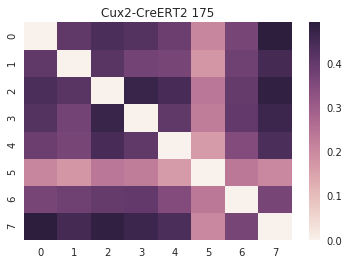

In [575]:
kt_matrix=np.zeros((len(rsms),len(rsms)))

for i,rsm1 in enumerate(rsms):
    for j,rsm2 in enumerate(rsms): 
        kt_matrix[i,j]=get_kt(rsm1,rsm2)
np.fill_diagonal(kt_matrix,0)
kt_df=pd.DataFrame(data=kt_matrix)
fig=plt.figure()
fig.add_subplot(111)
sns.heatmap(kt_df,vmin=0)
plt.title(cre_line+' '+str(imaging_depth))

In [576]:
def get_experiments_grouped(exps,targeted_structures,cre_lines,imaging_depths,donor_name=None,rsm_selection='mean'):
    ''' Gets Kendall tau measurement for all matrices for a certain list of
    visual areas, cre lines, and imaging depths
    If multiple RSAs exist for one mouse, average them together
    If multiple RSAs for one targeted structure, cre line, or imaging depth 
    
    For now, takes a list of ei'''
    #if type(imaging_depths)!='list':
    #    imaging_depths=[imaging_depths]
    #if type(cre_lines)!='list':
    #    cre_lines=[cre_lines]
    
    exps_grouped=pd.DataFrame(columns=['cre_line','imaging_depth','targeted_structure','rsm'])
    for cre_line in cre_lines:
        imaging_depths=exps[exps.cre_line==cre_line].imaging_depth.unique()
        for imaging_depth in imaging_depths:
            for targeted_structure in targeted_structures:
                available_targeted_structures=exps[(exps.cre_line==cre_line) & (exps.imaging_depth==imaging_depth)].targeted_structure.unique()
                if targeted_structure in available_targeted_structures:
                    if rsm_selection=='mean':
                        rsm=exps.groupby(['cre_line','imaging_depth','targeted_structure']).get_group((cre_line,imaging_depth,targeted_structure)).rsa_mean_mean_mahala.mean()
                        rsm[-119:,-119:]
                    elif rsm_selection=='random':
                        rsm=exps.groupby(['cre_line','imaging_depth','targeted_structure']).get_group((cre_line,imaging_depth,targeted_structure)).rsa_mean_mean_mahala.iloc[np.random.randint(0,high=exps.groupby(['cre_line','imaging_depth','targeted_structure']).get_group((cre_line,imaging_depth,targeted_structure)).shape[0])]
                        rsm[-119:,-119:]
                    to_add=pd.DataFrame(data=[cre_line,imaging_depth,targeted_structure,rsm],index=['cre_line','imaging_depth','targeted_structure','rsm'])                
                    exps_grouped=exps_grouped.append(to_add.T,ignore_index=True)
                else:
                    continue
    return exps_grouped

def get_kt_matrix(exps_grouped,compare):
    if compare=='targeted_structure':
        cre_lines=exps_grouped.cre_line.unique()
        for cre_line in cre_lines:
            imaging_depths=exps_grouped[exps_grouped.cre_line==cre_line].imaging_depth.unique()
            for imaging_depth in imaging_depths:
                exps_to_compare=exps_grouped.groupby(['cre_line','imaging_depth']).get_group((cre_line,imaging_depth))
                to_compare=exps_to_compare[compare]
                kt_matrix=np.zeros((len(to_compare),len(to_compare)))

                for i,rsm1 in enumerate(exps_to_compare.rsm):
                    for j,rsm2 in enumerate(exps_to_compare.rsm): 

                        kt_matrix[i,j]=get_kt(rsm1,rsm2)
                np.fill_diagonal(kt_matrix,0)
                kt_df=pd.DataFrame(data=kt_matrix,columns=to_compare,index=to_compare)
                fig=plt.figure()
                fig.add_subplot(111)
                if cre_line=='Cux2-CreERT2':
                    to_return=kt_df
                sns.heatmap(kt_df,vmin=0)
                plt.title(cre_line+' '+str(imaging_depth))
                
    elif compare=='imaging_depth':
        cre_lines=exps_grouped.cre_line.unique()
        for cre_line in cre_lines:
            targeted_structures=exps_grouped[exps_grouped.cre_line==cre_line].targeted_structure.unique()
            for targeted_structure in targeted_structures:
                exps_to_compare=exps_grouped.groupby(['cre_line','targeted_structure']).get_group((cre_line,targeted_structure))
                to_compare=exps_to_compare[compare]
                kt_matrix=np.zeros((len(to_compare),len(to_compare)))

                for i,rsm1 in enumerate(exps_to_compare.rsm):
                    for j,rsm2 in enumerate(exps_to_compare.rsm): 
                        kt_matrix[i,j]=get_kt(rsm1,rsm2)
                np.fill_diagonal(kt_matrix,0)
                kt_df=pd.DataFrame(data=kt_matrix,columns=to_compare,index=to_compare)
                fig=plt.figure()
                fig.add_subplot(111)
                sns.heatmap(kt_df,vmin=0)
                plt.title(cre_line+' '+str(targeted_structure))
                
    return to_return
        

    

In [665]:
def get_experiments_grouped(exps,targeted_structures,cre_lines,imaging_depths,donor_name=None,rsm_selection='mean'):
    ''' Gets Kendall tau measurement for all matrices for a certain list of
    visual areas, cre lines, and imaging depths
    If multiple RSAs exist for one mouse, average them together
    If multiple RSAs for one targeted structure, cre line, or imaging depth 
    
    For now, takes a list of ei'''
    #if type(imaging_depths)!='list':
    #    imaging_depths=[imaging_depths]
    #if type(cre_lines)!='list':
    #    cre_lines=[cre_lines]
    
    exps_grouped=pd.DataFrame(columns=['cre_line','imaging_depth','targeted_structure','rsm'])
    for cre_line in cre_lines:
        imaging_depths=exps[exps.cre_line==cre_line].imaging_depth.unique()
        for imaging_depth in imaging_depths:
            for targeted_structure in targeted_structures:
                available_targeted_structures=exps[(exps.cre_line==cre_line) & (exps.imaging_depth==imaging_depth)].targeted_structure.unique()
                if targeted_structure in available_targeted_structures:
                    if rsm_selection=='mean':
                        rsm=exps.groupby(['cre_line','imaging_depth','targeted_structure']).get_group((cre_line,imaging_depth,targeted_structure)).rsa_mean_mean_mahala.mean()
                        rsm[-119:,-119:]
                        to_add=pd.DataFrame(data=[cre_line,imaging_depth,targeted_structure,rsm],index=['cre_line','imaging_depth','targeted_structure','rsm'])
                    elif rsm_selection=='random':
                        rsm=exps.groupby(['cre_line','imaging_depth','targeted_structure']).get_group((cre_line,imaging_depth,targeted_structure)).rsa_mean_mean_mahala.iloc[np.random.randint(0,high=exps.groupby(['cre_line','imaging_depth','targeted_structure']).get_group((cre_line,imaging_depth,targeted_structure)).shape[0])]
                        rsm[-119:,-119:]
                        to_add=pd.DataFrame(data=[cre_line,imaging_depth,targeted_structure,rsm],index=['cre_line','imaging_depth','targeted_structure','rsm'])
                    elif rsm_selection=='all':
                        rsm=exps.groupby(['cre_line','imaging_depth','targeted_structure']).get_group((cre_line,imaging_depth,targeted_structure)).rsa_mean_mean_mahala
                        to_add=pd.DataFrame(data=[cre_line,imaging_depth,targeted_structure,rsm.iloc[0]],index=['cre_line','imaging_depth','targeted_structure','rsm'])                
                        for n in range(1,rsm.shape[0]):
                            to_add[str(n)]=pd.Series([cre_line,imaging_depth,targeted_structure,rsm.iloc[n]],index=['cre_line','imaging_depth','targeted_structure','rsm'])
                    exps_grouped=exps_grouped.append(to_add.T,ignore_index=True)
                    
                else:
                    continue
    return exps_grouped

def get_kt_matrix(exps_grouped,compare):
    if compare=='targeted_structure':
        cre_lines=exps_grouped.cre_line.unique()
        for cre_line in cre_lines:
            imaging_depths=exps_grouped[exps_grouped.cre_line==cre_line].imaging_depth.unique()
            for imaging_depth in imaging_depths:
                exps_to_compare=exps_grouped.groupby(['cre_line','imaging_depth']).get_group((cre_line,imaging_depth))
                to_compare=exps_to_compare[compare]
                kt_matrix=np.zeros((len(to_compare),len(to_compare)))

                for i,rsm1 in enumerate(exps_to_compare.rsm):
                    for j,rsm2 in enumerate(exps_to_compare.rsm): 

                        kt_matrix[i,j]=get_kt(rsm1,rsm2)
                np.fill_diagonal(kt_matrix,0)
                kt_df=pd.DataFrame(data=kt_matrix,columns=to_compare,index=to_compare)
                fig=plt.figure()
                fig.add_subplot(111)
                if cre_line=='Cux2-CreERT2':
                    to_return=kt_df
                sns.heatmap(kt_df,vmin=0)
                plt.title(cre_line+' '+str(imaging_depth))
                
    elif compare=='imaging_depth':
        cre_lines=exps_grouped.cre_line.unique()
        for cre_line in cre_lines:
            targeted_structures=exps_grouped[exps_grouped.cre_line==cre_line].targeted_structure.unique()
            for targeted_structure in targeted_structures:
                exps_to_compare=exps_grouped.groupby(['cre_line','targeted_structure']).get_group((cre_line,targeted_structure))
                to_compare=exps_to_compare[compare]
                kt_matrix=np.zeros((len(to_compare),len(to_compare)))

                for i,rsm1 in enumerate(exps_to_compare.rsm):
                    for j,rsm2 in enumerate(exps_to_compare.rsm): 
                        kt_matrix[i,j]=get_kt(rsm1,rsm2)
                np.fill_diagonal(kt_matrix,0)
                kt_df=pd.DataFrame(data=kt_matrix,columns=to_compare,index=to_compare)
                fig=plt.figure()
                fig.add_subplot(111)
                sns.heatmap(kt_df,vmin=0,vmax=0.5)
                plt.title(cre_line+' '+str(targeted_structure))
                
    return to_return
        

    

In [666]:
# within area RSM comparisons 

In [667]:
cre_lines=[u'Cux2-CreERT2',
 u'Emx1-IRES-Cre',
 u'Nr5a1-Cre',
 u'Rbp4-Cre_KL100',
 u'Rorb-IRES2-Cre']
imaging_depths=boc.get_all_cre_lines()
targeted_structures=boc.get_all_targeted_structures()
cre_lines

[u'Cux2-CreERT2',
 u'Emx1-IRES-Cre',
 u'Nr5a1-Cre',
 u'Rbp4-Cre_KL100',
 u'Rorb-IRES2-Cre']

In [668]:
# to do: 
# 1) organize areas the way saskia wants them
# 2) make bunch of plots based on different cre-lines and layer distinctions 
# 3) make ari's plot and make plots that have all of the kt values within all of the RSMs in a specific experiment. 

In [669]:
cre_line='Cux2-CreERT2'
imaging_depth=175
targeted_structure='VISp'
rsm=exps_grouped.rsm.iloc[0]
to_add=pd.DataFrame(data=[cre_line,imaging_depth,targeted_structure,rsm],index=['cre_line','imaging_depth','targeted_structure','rsm'])

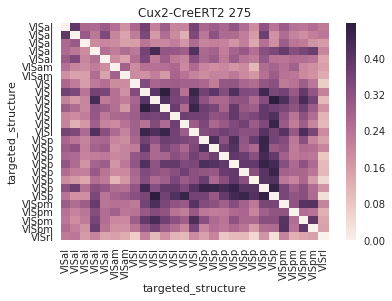

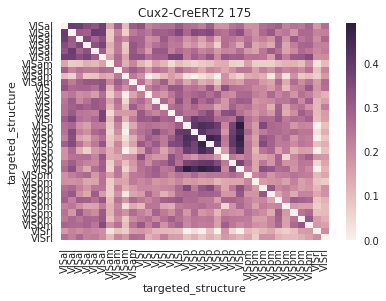

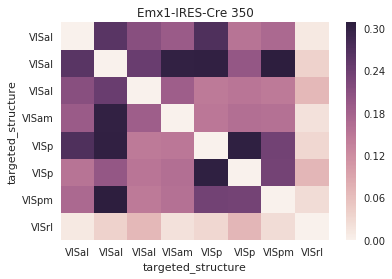

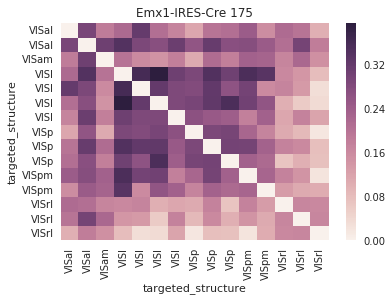

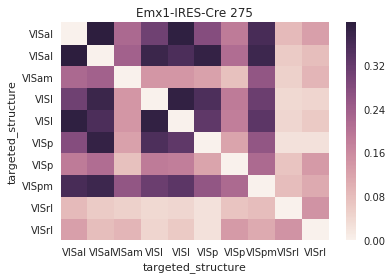

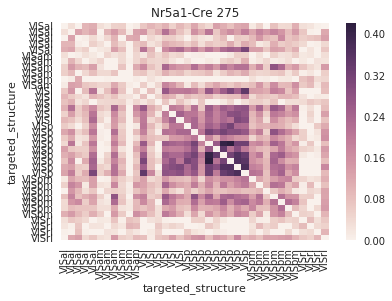

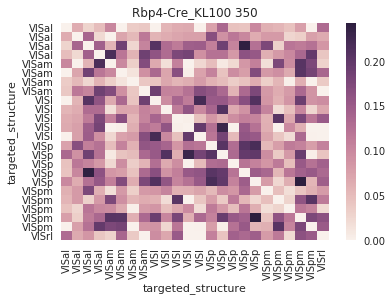

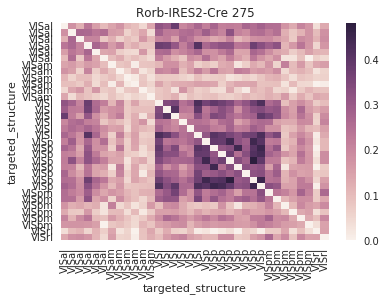

In [670]:
exps_grouped=get_experiments_grouped(exps,targeted_structures,cre_lines,imaging_depths,rsm_selection='all')
kt_df=get_kt_matrix(exps_grouped,'targeted_structure')


In [647]:
exps_grouped.head()

,cre_line,imaging_depth,targeted_structure,rsm
0,Cux2-CreERT2,275,VISal,"[[0.0, 14.0271879134, 17.7364615024, 17.471313..."
1,Cux2-CreERT2,275,VISam,"[[0.0, 15.0717277058, 11.2159497239, 12.801501..."
2,Cux2-CreERT2,275,VISl,"[[0.0, 7.33733629106, 8.34693519582, 10.782357..."
3,Cux2-CreERT2,275,VISp,"[[0.0, 39.6524266268, 25.6649943095, 24.049487..."
4,Cux2-CreERT2,275,VISpm,"[[0.0, 19.7419737586, 18.8471920454, 19.023857..."


In [236]:
exps_grouped['targeted_structure'].unique()

array([u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl'], dtype=object)

In [290]:
available_targeted_structures=exps[(exps.cre_line==cre_line) & (exps.imaging_depth==imaging_depth)].targeted_structure.unique()
available_targeted_structures

array([u'VISam', u'VISpm', u'VISp', u'VISl', u'VISal', u'VISrl'], dtype=object)

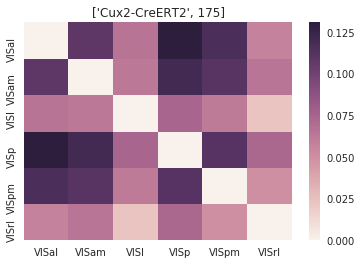

In [231]:
for cre_line in cre_lines
sns.heatmap(kt_df)
plt.title(cre_lines+imaging_depths)

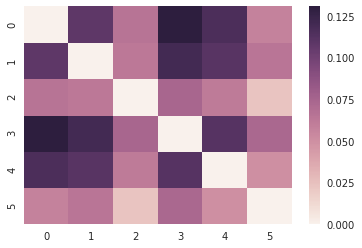

In [164]:
np.fill_diagonal(kt_matrix,0)
sns.heatmap(kt_matrix)

In [100]:
rsm=exps.groupby(['cre_line','imaging_depth','targeted_structure']).get_group((cre_line,imaging_depth,targeted_structure)).rsm.mean()

In [101]:
to_add=pd.DataFrame(data=[cre_line,imaging_depth,targeted_structure,rsm],index=['cre_line','imaging_depth','targeted_structure','rsm'])

In [102]:
exps_grouped=exps_grouped.append(to_add.T)

In [124]:
exps_grouped.head()

,cre_line,imaging_depth,targeted_structure,rsm
0,Cux2-CreERT2,175,VISal,"[[0.0, 0.104234177417, 0.0449146271004, -0.025..."
1,Cux2-CreERT2,175,VISam,"[[1.0, 0.0204059826005, -0.098488108621, 0.040..."
2,Cux2-CreERT2,175,VISl,"[[1.0, 0.0665626597067, 0.0369762631685, -0.10..."
3,Cux2-CreERT2,175,VISp,"[[1.0, 0.141161004643, 0.0464758065598, 0.0046..."
4,Cux2-CreERT2,175,VISpm,"[[1.0, 0.0878812707308, -0.125047709397, -0.16..."
